# AMath 584 Homework 1, Problem 5 solution

Autumn Quarter 2016



In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_matrix(C):
    
    imshow(C, cmap='Greys', interpolation='none')

    # Add grid lines for clarity:
    x = linspace(-0.5,9.5,11)
    y = x
    [X,Y] = meshgrid(x,y)
    plot(X.T,Y.T,'r');
    plot(X,Y,'r');
    axis('scaled')
    axis([-0.5, 9.5, -0.5, 9.5])

## Problem 5a.

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


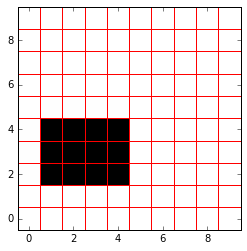

In [3]:
a1 = array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0]]).T
b1 = array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0]]).T
A1 = dot(a1,b1.T)

print A1
plot_matrix(A1)

## Problem 5b.

Here are the vectors $a_2$ and $b_2$ and the matrix they generate:

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


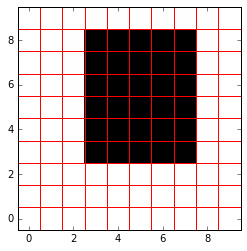

In [4]:
a2 = array([[0, 0, 0, 1, 1, 1, 1, 1, 1, 0]]).T
b2 = array([[0, 0, 0, 1, 1, 1, 1, 1, 0, 0]]).T
A2 = dot(a2,b2.T)

print A2
plot_matrix(A2)

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.3  0.3  0.3  0.3  0.   0.   0.   0.   0. ]
 [ 0.   0.3  0.3  0.9  0.9  0.6  0.6  0.6  0.   0. ]
 [ 0.   0.3  0.3  0.9  0.9  0.6  0.6  0.6  0.   0. ]
 [ 0.   0.   0.   0.6  0.6  0.6  0.6  0.6  0.   0. ]
 [ 0.   0.   0.   0.6  0.6  0.6  0.6  0.6  0.   0. ]
 [ 0.   0.   0.   0.6  0.6  0.6  0.6  0.6  0.   0. ]
 [ 0.   0.   0.   0.6  0.6  0.6  0.6  0.6  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]


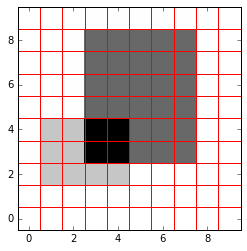

In [5]:
C = 0.3*A1 + 0.6*A2
print C
plot_matrix(C)

## Problem 5c

In [6]:
[U,Sigma,Vstar] = svd(C)

Note that `Sigma` is returned as a 1-dimensional array of the singular values (not a diagonal matrix). Only the first two are above the "rounding error" level of about `1e-16`:

In [7]:
print 'Sigma =\n', Sigma

Sigma =
[  3.57082802e+00   7.54444992e-01   1.74499929e-16   3.39337834e-17
   9.48458174e-34   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


In [8]:
u1 = U[:,0:1]  # first column as a 10 by 1 column vector
print 'u1 = \n', u1

u1 = 
[[  0.00000000e+00]
 [ -2.22044605e-16]
 [ -9.76098267e-02]
 [ -4.68758068e-01]
 [ -4.68758068e-01]
 [ -3.71148241e-01]
 [ -3.71148241e-01]
 [ -3.71148241e-01]
 [ -3.71148241e-01]
 [  0.00000000e+00]]


In [9]:
V = Vstar.T    #  V is real so adjoint of Vstar equals the transpose Vstar.T
v1 = V[:,0:1]
print 'v1 = \n', v1

v1 = 
[[ 0.        ]
 [-0.0869652 ]
 [-0.0869652 ]
 [-0.49394797]
 [-0.49394797]
 [-0.40698277]
 [-0.40698277]
 [-0.40698277]
 [ 0.        ]
 [ 0.        ]]


Compute the best rank-1 approximation $C_1 = \sigma_1u_1v_1^T$ and the best rank-2 approximation $C_2 = \sigma_1u_1v_1^T + \sigma_2u_2v_2^T$ and then check that this latter matrix agrees with the original $C$ to within rounding error:

In [10]:
u2 = U[:,1:2]

v2 = V[:,1:2]
C1 = Sigma[0]*dot(u1,v1.T)       # best rank-1 approximation
C2 = C1 + Sigma[1]*dot(u2,v2.T)  # best rank-2 approximation

Cdiff = C - C2
print "The maximum element in C-C2 is of magnitude ", abs(Cdiff).max()


The maximum element in C-C2 is of magnitude  9.02056207508e-16


## Problem 5d

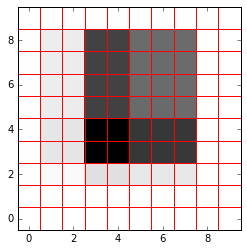

In [11]:
plot_matrix(C1)

Note there is a faint gray band of cells (corresponding to small elements in $C_1$) that doesn't show up in the Matlab results if you used the colormap suggested in the problem since it only had 11 levels fo gray!

## Problem 5e.


In [12]:
print "The inner product of u1 and u2 is ", dot(u1.T, u2)

The inner product of u1 and u2 is  [[  1.11022302e-16]]


In [13]:
M = hstack((u1,u2,a1,a2))
print M

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -2.22044605e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -9.76098267e-02  -6.47335887e-01   1.00000000e+00   0.00000000e+00]
 [ -4.68758068e-01  -3.70686836e-01   1.00000000e+00   1.00000000e+00]
 [ -4.68758068e-01  -3.70686836e-01   1.00000000e+00   1.00000000e+00]
 [ -3.71148241e-01   2.76649050e-01   0.00000000e+00   1.00000000e+00]
 [ -3.71148241e-01   2.76649050e-01   0.00000000e+00   1.00000000e+00]
 [ -3.71148241e-01   2.76649050e-01   0.00000000e+00   1.00000000e+00]
 [ -3.71148241e-01   2.76649050e-01   0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]


In [14]:
print "The rank of the matrix M is ", matrix_rank(M)

The rank of the matrix M is  2


The vectors $u_1$ and $u_2$ are orthogonal so they span a 2-dimensional space $S_1$, and $a_1$ and $a_2$ are linearly independent and span a 2-dimensional space $S_2$ (otherwise $C$ would not have 2 nonzero singular values).  The fact that the matrix $M$ has rank 2 means its range is a 2-dimensional space that must contain both $S_1$ and $S_2$, and so these spaces must all be the same. Alternatively we see that $a_1$ and $a_2$ must be in the span of $u_1$ and $u_2$ and vice versa.